# BMF Project Week 3
Llan Almendariz (1419951)

In [1]:
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd 


In [2]:
f = "ml2023_projectmbf-main/data_labeled_fixed.csv"

In [3]:
f = "../../ml2023/data_labeled.csv"

In [4]:
df = pd.read_csv(f, header=0)

In [5]:
df.head()

,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Rnr1,mt-Rnr2,CELLTYPE,CLASS
0,3,0,0,1,2,0,1,0,3,2,...,0,12,3,5,5,4,2,25,BC6,Cone Bipolar ON
1,0,1,0,0,0,0,3,0,0,4,...,1,5,1,0,2,1,0,16,BC3B,Cone Bipolar OFF
2,0,0,0,0,0,0,2,1,0,0,...,0,12,5,3,10,4,1,14,BC6,Cone Bipolar ON
3,0,1,0,4,0,0,1,0,0,1,...,0,8,1,3,3,1,0,7,BC3A,Cone Bipolar OFF
4,0,1,0,1,0,0,7,1,2,4,...,0,17,7,3,0,4,0,3,BC7,Cone Bipolar ON


In [6]:
df.shape

(3724, 454)

# Principal Component Analysis

In [7]:
exp = df.drop(["CLASS", "CELLTYPE"], axis = 1)
genes = exp.columns

In [8]:
scaler = StandardScaler().fit(exp)
exp = scaler.transform(exp)

In [9]:
ncomp =  451
pca = PCA(n_components=ncomp)

In [10]:
comp = pca.fit_transform(exp)
score = pd.DataFrame(comp, columns=["".join(["PC", str(x)]) for x in range(1,ncomp+1)])
score = pd.concat([score, df["CLASS"]], axis = 1)

In [11]:
loadings = pd.DataFrame(np.transpose(pca.components_), columns = ["".join(["PC", str(x)]) for x in range(1,ncomp+1)])
labels = pd.DataFrame(genes, columns=["gene"])
loadings = pd.concat([loadings, labels], axis =1)

In [12]:
loadings[["PC1"]].idxmax()

PC1    138
dtype: int64

In [13]:
loadings.PC2.idxmax()

146

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as Colors

In [15]:
pca.explained_variance_ratio_.sum()

0.9996460209127821

In [16]:
varexp = pca.explained_variance_ratio_[:51]*100

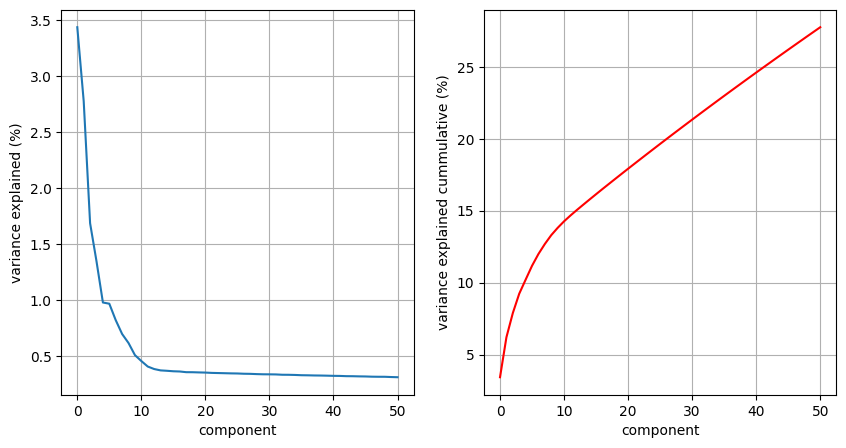

In [17]:
fig, axes = plt.subplots(1,2, figsize = (10, 5), sharex=True)
axes[0].plot(varexp)
axes[0].set_xlabel("component")
axes[0].set_ylabel("variance explained (%)")
axes[0].grid()

axes[1].plot(varexp.cumsum(), "r")
axes[1].set_xlabel("component")
axes[1].set_ylabel("variance explained cummulative (%)")
axes[1].grid()
plt.savefig("variance_explained_PCA.png", dpi = 350)

In [18]:
def biplot(score, loadings, hue_col, n, sf = 0.5):
    """
    function that creates a biplot 

    score: a score dataframe with all PCs with class label column.
    loadings: the loadings for PCs with gene label column.
    n: number of features to plot as vector from both PCs.
    sf: scaling factor to adjust size of vectors.
    
    """
    
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig, axes = plt.subplots(figsize = (7, 7))
    sns.scatterplot(ax=axes, x= score.PC1 * scalex, y=score.PC2*scaley, hue = df[hue_col], alpha =0.6)
    abs_loadings = abs(loadings[["PC1", "PC2"]])

    arrows = np.concatenate([abs_loadings.PC1.nlargest(n).index.values, abs_loadings.PC2.nlargest(n).index.values])
    for arrow in arrows:
        x, y, label = loadings.iloc[arrow, :]
        x, y = x * sf, y * sf
        plt.arrow(0, 0,  x, y, color = 'r',alpha = 0.5)
        plt.text(x * 1.15, y * 1.15, label, va = "center", ha = "center", size = 10)

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

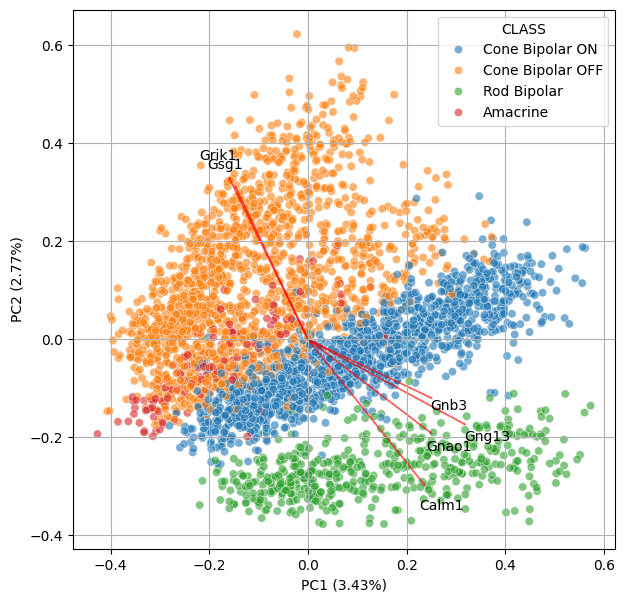

In [19]:
biplot(score, loadings[["PC1", "PC2", "gene"]], "CLASS",3, 2)
plt.xlabel("PC1 (3.43%)")
plt.ylabel("PC2 (2.77%)")
plt.savefig("pca_w_vector.png", dpi = 350)

In [20]:
score["CELLTYPE"] = df["CELLTYPE"]

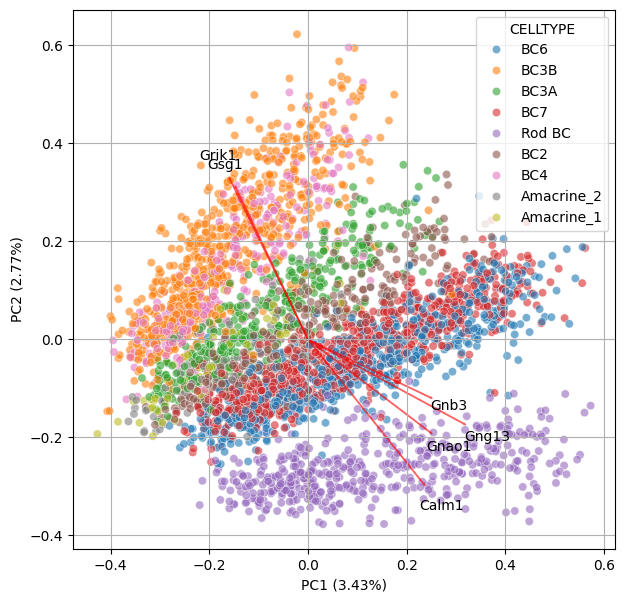

In [21]:
biplot(score, loadings[["PC1", "PC2", "gene"]], "CELLTYPE",3, 2)
plt.xlabel("PC1 (3.43%)")
plt.ylabel("PC2 (2.77%)")
plt.savefig("PCA_celltype.png", dpi = 350)

In [22]:
abs_loadings = abs(loadings[["PC1", "PC2"]])

In [23]:
pc1 = loadings.iloc[abs_loadings.PC1.nlargest(15).index].loc[:,["PC1", "PC2", "gene"]].sort_values("PC1")
pc2 = loadings.iloc[abs_loadings.PC2.nlargest(15).index].loc[:,["PC1", "PC2", "gene"]].sort_values("PC2")


In [24]:
pc1.to_csv("nlargest_pc1_genes.csv", index=False,float_format = "%.3f")
pc2.to_csv("nlargest_pc2_genes.csv", index=False,float_format = "%.3f")

In [25]:
pc1

,PC1,PC2,gene
394,0.096337,-0.085033,Tgfb2
352,0.097492,0.034731,Slc25a4
411,0.097493,0.020072,Ttyh1
143,0.099972,-0.097274,Gpr179
445,0.101955,-0.006113,mt-Cytb
147,0.104801,-0.064629,Grm6
210,0.107498,0.082457,Mgarp
267,0.111283,-0.138638,Pcp2
12,0.114900,-0.022068,Aplp2
181,0.115886,-0.090806,Isl1


# k-means 

In [26]:
from sklearn.cluster import KMeans

In [27]:
def km_cluster(data, nk = range(1, 3)):

    res = []
    for k in nk:
        km = KMeans(n_clusters=k)
        fitted = km.fit(data)
        res.append(fitted.inertia_)
    
    res = np.array(res)
    X = x = np.arange(1,len(nk)+1, step = 1)
    
    fig, axes = plt.subplots(1,1, figsize = (5,5))
    sns.lineplot(x = X, y = res, ax=axes, color = "black")
    sns.scatterplot(x = X, y=res, ax=axes, color = "r")
    plt.xlabel("k")
    plt.ylabel("Inertia")
    plt.xticks(X)
    plt.grid()


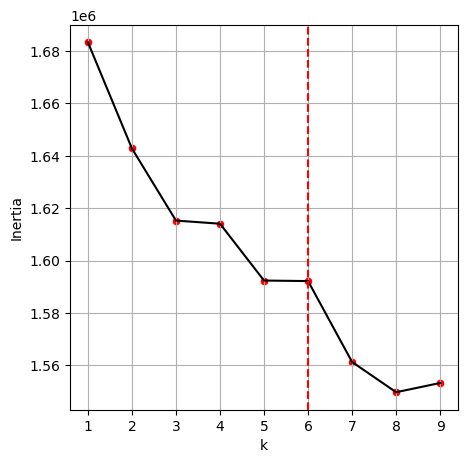

In [28]:
km_cluster(exp, nk = range(1, 10))
plt.axvline(6, linestyle="--", color = "r")
plt.savefig("kmeans_elbowplot.png", dpi = 350)

In [29]:
km = KMeans(n_clusters=6)
fitted = km.fit(exp)

In [30]:
cl_score = pd.concat([score, pd.Series(fitted.labels_, name = "Cluster")], axis = 1)

In [31]:
def is_in(x, l):
    if x in l:
        x = True
    else: 
        x = False
    return x

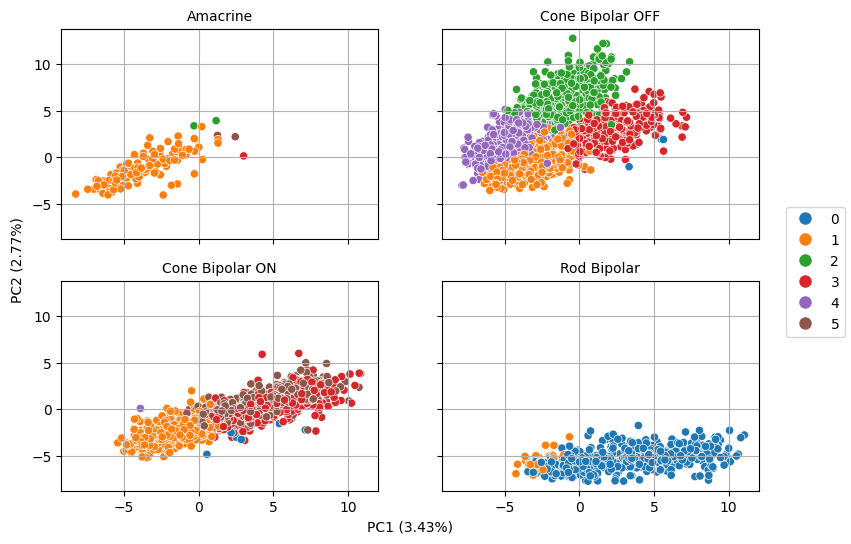

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(9,6), sharex = True, sharey = True)
place = pd.DataFrame(np.matrix("0 0; 0 1;1 0; 1 1"))
colormap = dict(zip( range(0,6), sns.color_palette(as_cmap = True)[:-3]))


for i, (k, sub) in enumerate(cl_score.groupby("CLASS")):
    ii, j = place.iloc[i,:]
    sns.scatterplot(data=sub, x="PC1", y="PC2", hue="Cluster", palette=colormap, ax=axes[ii, j], alpha =1)
    axes[ii,j].set_xlabel("")
    axes[ii,j].set_ylabel("")
    axes[ii,j].set_title(k, size = 10)
    axes[ii,j].get_legend().remove()
    axes[ii,j].grid()
    
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("PC1 (3.43%)")
plt.ylabel("PC2 (2.77%)")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in colormap.items()]
fig.legend(handles=handles, loc="right", ncol=1)
plt.savefig("kmeans_6_inPCA.png", dpi = 350, bbox_inches="tight")

In [33]:
cl_score.Cluster.value_counts()

Cluster
1    1139
3     672
4     541
0     484
5     479
2     409
Name: count, dtype: int64

# SVM classifier using pca data

In [34]:
import sklearn.svm as svm 
import sklearn.model_selection as skm
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix, mean_squared_error, accuracy_score, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
pca_sub = score.iloc[:,:12]
pca_sub[["CLASS", "CELLTYPE"]] = df[["CLASS", "CELLTYPE"]]

In [36]:
# splitting the data 
train, test = skm.train_test_split(pca_sub, random_state=1)
X_train, X_test = train.drop(["CLASS", "CELLTYPE"], axis=1), test.drop(["CLASS", "CELLTYPE"], axis = 1)
Y_train, Y_test = train["CLASS"], test["CLASS"]



In [37]:
# optimizing parameters

clf_opt = clf = svm.SVC(decision_function_shape='ovr')
to_optimize = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']}  
 ]

search = skm.GridSearchCV(clf_opt, param_grid=to_optimize,)
find = search.fit(X_train, Y_train)

In [38]:
# turning the optimization results into a dataframe
dfa = pd.DataFrame(find.cv_results_)

In [39]:
dfa.sort_values("rank_test_score", ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.013423,0.000677,0.004771,0.000220,10,rbf,0.001,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.991055,0.996422,0.992844,1.000000,0.991039,0.994272,0.003472,1
9,0.012716,0.000223,0.004249,0.000137,100,rbf,0.0001,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.991055,0.996422,0.992844,1.000000,0.989247,0.993914,0.003858,2
25,0.019261,0.000568,0.005048,0.000079,100,sigmoid,0.0001,"{'C': 100, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.991055,0.996422,0.991055,0.998208,0.991039,0.993556,0.003121,3
8,0.011349,0.000565,0.002762,0.000105,100,rbf,0.001,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.989267,0.996422,0.992844,0.996416,0.992832,0.993556,0.002677,4
27,0.014173,0.000792,0.002788,0.000114,1000,sigmoid,0.0001,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.989267,0.994633,0.992844,0.998208,0.991039,0.993198,0.003079,5


In [40]:
clf = svm.SVC(kernel = "rbf", C=10, gamma = 0.001)
clfit = clf.fit(X_train, Y_train)

In [41]:
def crossval(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)

In [42]:
def Kcrossval(data, model, dep, to_remove=[], k=0):
    kf = skm.KFold(n_splits=k)
    splits = kf.split(data)
    
    results = []
    for i, (train, test) in enumerate(splits):
        X_train, Y_train = data.drop(dep, axis =1).drop(to_remove, axis= 1).iloc[train,:], data[dep][train]
        X_test, Y_test = data.drop(dep, axis=1).drop(to_remove, axis = 1).iloc[test, :], data[dep][test]
        
        model = model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        
        if Y_test.dtype != int:
            #results.append(accuracy_score(Y_test, Y_pred))
            results.append(classification_report(Y_test, Y_pred, target_names=model.classes_, output_dict = True))
        else:
            results.append(mean_squared_error(Y_test, Y_pred))
            
    
    return np.array(results)

In [43]:
clf.classes_

array(['Amacrine', 'Cone Bipolar OFF', 'Cone Bipolar ON', 'Rod Bipolar'],
      dtype=object)

In [44]:
report = Kcrossval(pca_sub, clf, "CLASS", ["CELLTYPE"], 5)

In [45]:
dfs = []
for entry in report:
    dfs.append(pd.DataFrame(entry))

In [46]:
mat3d = np.array([df.values for df in dfs])

In [47]:
pd.DataFrame(np.mean(mat3d, axis=0), columns = dfs[0].columns, index = dfs[0].index).to_csv("SVM_classification_PCA.csv")

In [56]:
df = pd.DataFrame(np.mean(mat3d, axis=0), columns = dfs[0].columns, index = dfs[0].index)

In [64]:
df2 = pd.read_csv("SVM_classification.csv", index_col=0 )

In [73]:
(df-df2).round(3).to_clipboard()

# Variance inflation factor (VIF)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [50]:
X = add_constant(pd.DataFrame(exp))

In [51]:
d= pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [52]:
d = d.iloc[1:]

In [53]:
d.index = df.columns[:-2]

In [54]:
d.describe()

count    452.000000
mean       1.334028
std        0.341447
min        1.125492
25%        1.189363
50%        1.222446
75%        1.327872
max        4.872839
dtype: float64

# Session Info

In [55]:
import session_info
session_info.show()